# Cluster Analysis of Gene Expressions

### Data from rom the NIH LINCS DCIC Crowdsourcing Portal and Ma’ayan Lab @ Mt Sinai, New York.http://www.maayanlab.net/crowdsourcing/megatask2.php

### Submitted by:
### Evgeniia Shcherbinina, Jorie Fernandez, Mona Esmaeili




### Install R package factoextra, which will be used to plot and identify k clusters in both hierarchical and k-means clustering. The package provided the functions fviz_nbclust() to plot the silhouette and elbow method and the fviz_cluster() to vizualize the resulting clusters. The cluster analysis and the use of this package is based from the demonstration provided by the UC Business Analytics R Programming Guide at https://uc-r.github.io/hc_clustering.

In [172]:
install.packages("factoextra")

Installing package into 'C:/Users/Jorie/Documents/R/win-library/3.5'
(as 'lib' is unspecified)
Warning message:
"package 'factoextra' is in use and will not be installed"

## Read data from gene_expression.

In [173]:
my.data <- read.table ("gene_expression_n438x978.txt", sep="\t", header=T)
dimnames(my.data)[[1]] <- my.data[,1]
my.data <- my.data[, -1]

# transpose data to examine the genes
rev.data <- t(my.data)
# verify dimensions
dim(rev.data)
# check few rows of data
head(rev.data)

[1] 978 438

ACETAZOLAMIDE IRBESARTAN  IPRATROPIUM BROMIDE EFAVIRENZ    THIAMINE    
PSME1 -0.015159099  -0.02681198  0.0010179582       -0.004398264  0.001838965
ATF1  -0.031470528   0.01215198 -0.0086506221        0.055387992 -0.018079188
RHEB  -0.004733488  -0.02555015 -0.0181286977        0.004658520 -0.011855532
FOXO3  0.025910609  -0.02401181 -0.0207997145        0.013807318 -0.037050333
RHOA   0.005629677  -0.01067174 -0.0002722781       -0.034069735 -0.013395496
IL1B  -0.007325439   0.07095115  0.0250033604        0.024005885 -0.001752450
      IOXAGLATE     ARTICAINE    IOVERSOL     DONEPEZIL    DOMPERIDONE  ...
PSME1 -0.0003519442  0.022574709  0.024636049  0.016935460 -0.003093831 ...
ATF1   0.0129305436  0.014786969 -0.013920003  0.015376043  0.005108595 ...
RHEB  -0.0031503975  0.006609688  0.007674374  0.006981167  0.004596568 ...
FOXO3  0.0207519580 -0.013522663  0.047855790 -0.011331810 -0.006630668 ...
RHOA  -0.0237654746  0.010697759  0.047665542 -0.004203102 -0.007690769 ...
IL1B   0.0032569917  0.003279990 -0.025180972  0.007288716 -0.029463507 ...
      ZOLMITRIPTAN BENZYDAMINE   RAPAMYCIN    TROGLITAZONE PYRIMETHAMINE
PSME1  0.003147303  0.0212983090  0.014998057 -0.005328607  0.016972489 
ATF1  -0.006335533 -0.0024952677 -0.022449156  0.003196748 -0.027713245 
RHEB  -0.005549372 -0.0016689228 -0.004859035  0.009389807 -0.015493314 
FOXO3  0.015365487 -0.0095092997  0.001646894 -0.043149427  0.005939961 
RHOA  -0.018645195  0.0183115189  0.006329492  0.034124525 -0.011247316 
IL1B  -0.004154139  0.0007429668  0.003230122  0.007609092  0.087343661 
      PYRIDOSTIGMINE OLANZAPINE   PIROXICAM    OFLOXACIN     ECONAZOLE    
PSME1 -0.028249886   -0.013792785  0.051962098  0.0002983165 -0.0126513884
ATF1  -0.003042233    0.029129081 -0.036226433  0.0416356348 -0.0041733976
RHEB  -0.002013865   -0.001954723 -0.003465187  0.0236728378 -0.0008871078
FOXO3 -0.002028980    0.027201148  0.009898470  0.0010094419 -0.0096953885
RHOA  -0.027579452   -0.002478270 -0.002298708  0.0204395371  0.0835329419
IL1B   0.026905885    0.010322911 -0.008706882 -0.0305746586  0.0229952261

## 1. Hierarchical Clustering

#### Hierarchical clustering is a method that imposes hierarchical structure on the data objects and their step-wise clusters. It does not require us to pre-specify the number of clusters. Using the complete link method to identify the dissimilarities in the cluster, it tends to produce a more compact clusters. This is because it considers the largest distance value between the clusters (UC Business Analytics R Programming Guide).


### Hierarchical clustering based on Euclidean Distance.

#### Euclidean distance is a Minkowski metric represented as the square root of the sums of the squares of the differences between the coordinates of the points in each dimension. It allows us to represent a cluster by its centroid or average of the points in the cluster (Reference: http://infolab.stanford.edu/~ullman/mmds/ch7.pdf)

In [174]:
# Hierarchical clustering of the gene expression using the complete and euclidean distance.
ret.hclust1 <- hclust(dist(rev.data, method = "euclidean"), method = "complete")

#### The dendogram below shows the value of the Eulidean distance metric between the clusters on y-axis and x-axis shows the clusters. Here, the highest value is 2.

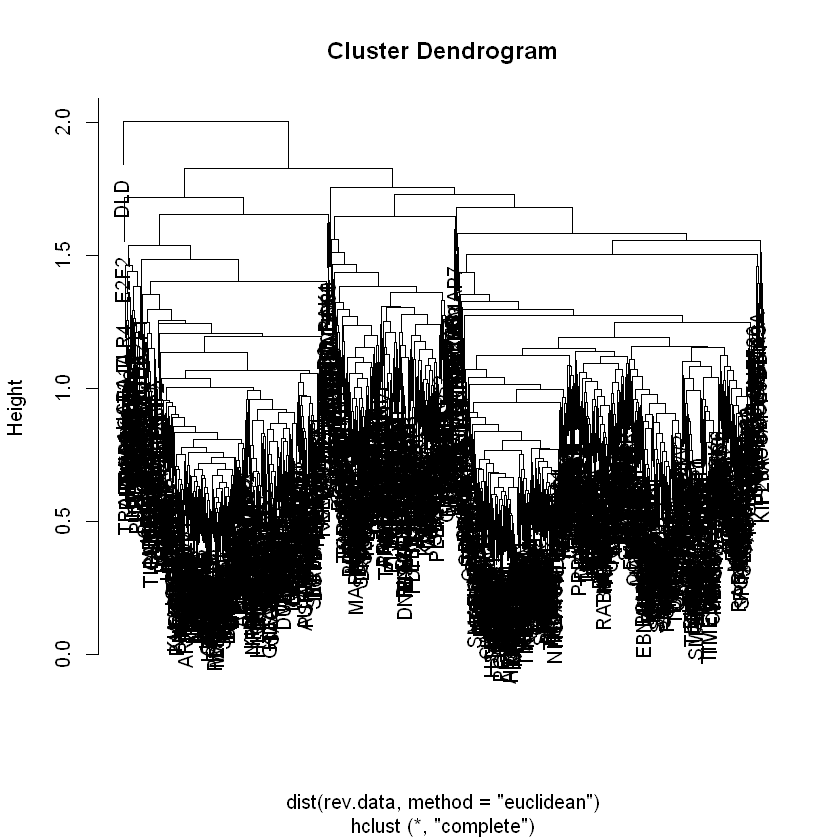

In [175]:
# Plot the cluster dendogram.
plot(ret.hclust1)

#### The heatmap for the hierarchical clustering using Euclidean distance does not clearly show separation of clusters. Although, we can see some patterns, it is not concentrated in just one side. 

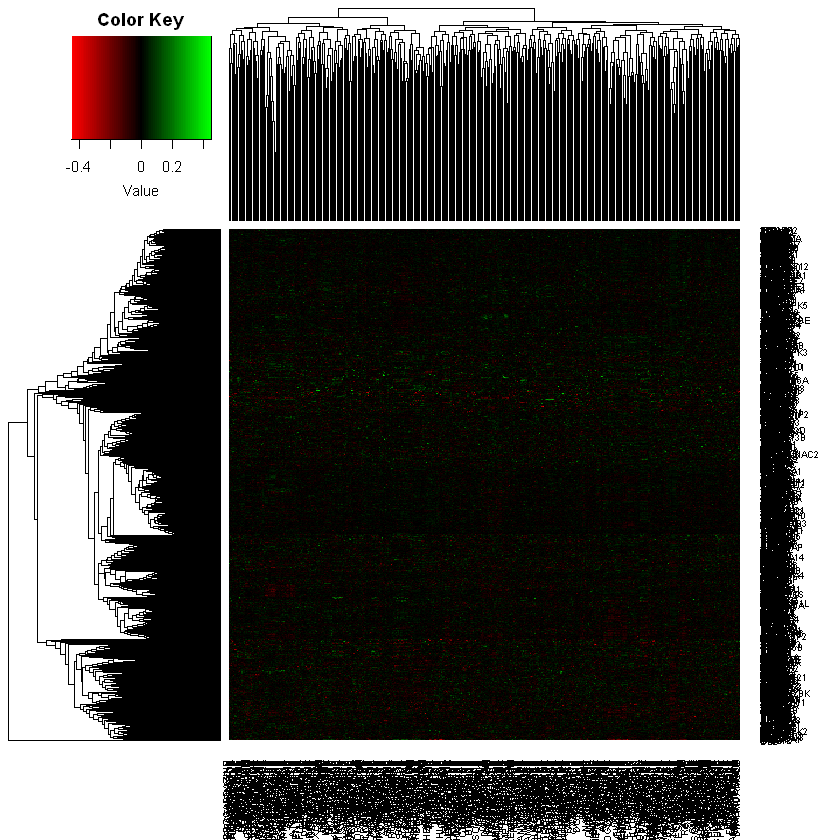

In [176]:
# Generate heatmap.
library (gplots)
heatmap.2 (as.matrix(rev.data), trace="none", density.info="none", col = redgreen(75))

#### To determine the number of clusters we can cut, we can use the library factoextra using the average silhouette method. The silhouette approach measures the quality of a clustering. That is, it determines how well each object lies within its cluster. A high average silhouette width indicates a good clustering. The average silhouette method computes the average silhouette of observations for different values of k. The optimal number of clusters k is the one that maximizes the average silhouette over a range of possible values for k (Reference: https://uc-r.github.io/kmeans_clustering#silo)

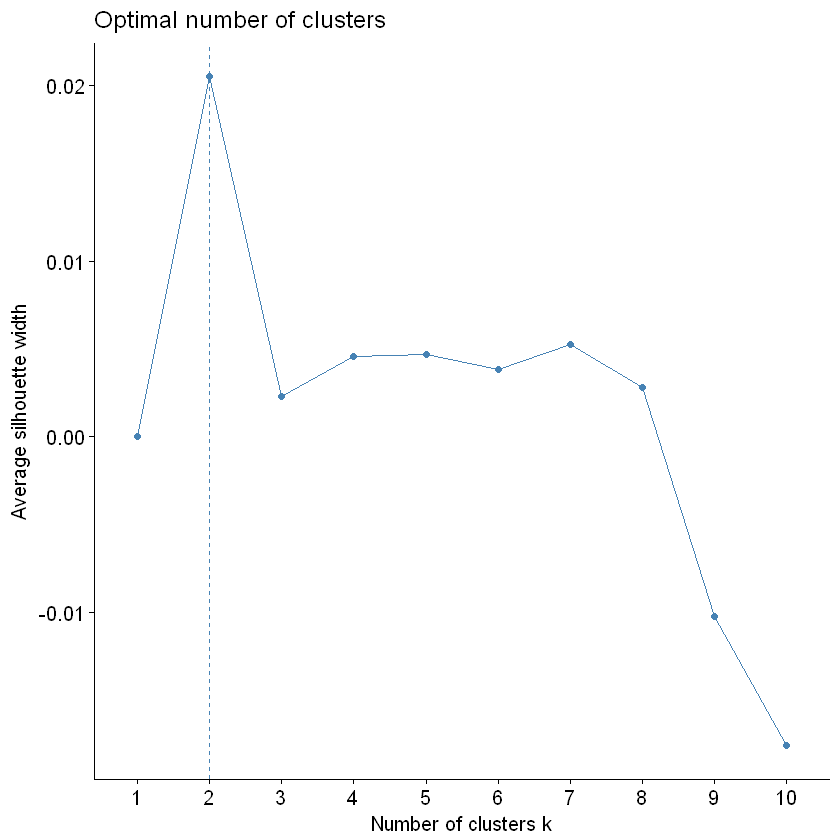

In [177]:
# Use average silhouette method to identify k-value. 
# Note that the FUN function is hcut to indicate that we are using hierarchical clustering.
library(factoextra)
fviz_nbclust(rev.data, FUN = hcut, method = "silhouette") 

#### If we will use k=2, the following clusters are shown. We can see that majority is identified as cluster 1 with a size of 977, while the second cluster is only 1.

In [178]:
# Cut at 2 clusters
groups1 <- cutree (ret.hclust1, k=2)

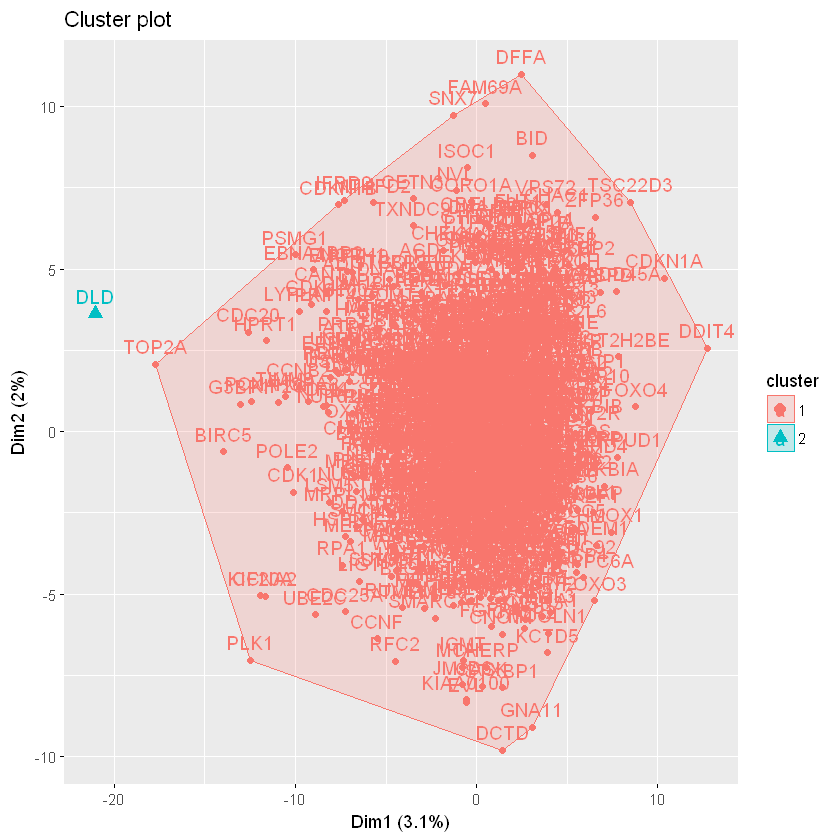

In [179]:
# Visualize the groups.
fviz_cluster(list(data = rev.data, cluster = groups1))

In [180]:
# Determine the size of each clusters.
table(groups1)

groups1
  1   2 
977   1 

#### Using 3 clusters,  we can see the numbers of each clusters change. However, checking the plot, there are group members that overlap with the other clusters. There are also cluster members that are uniquely identified in the plot (i.e GNA11 and DCTD for cluster 2).

In [181]:
groups2 <- cutree (ret.hclust1, k=3)

In [182]:
table(groups2)

groups2
  1   2   3 
664 313   1 

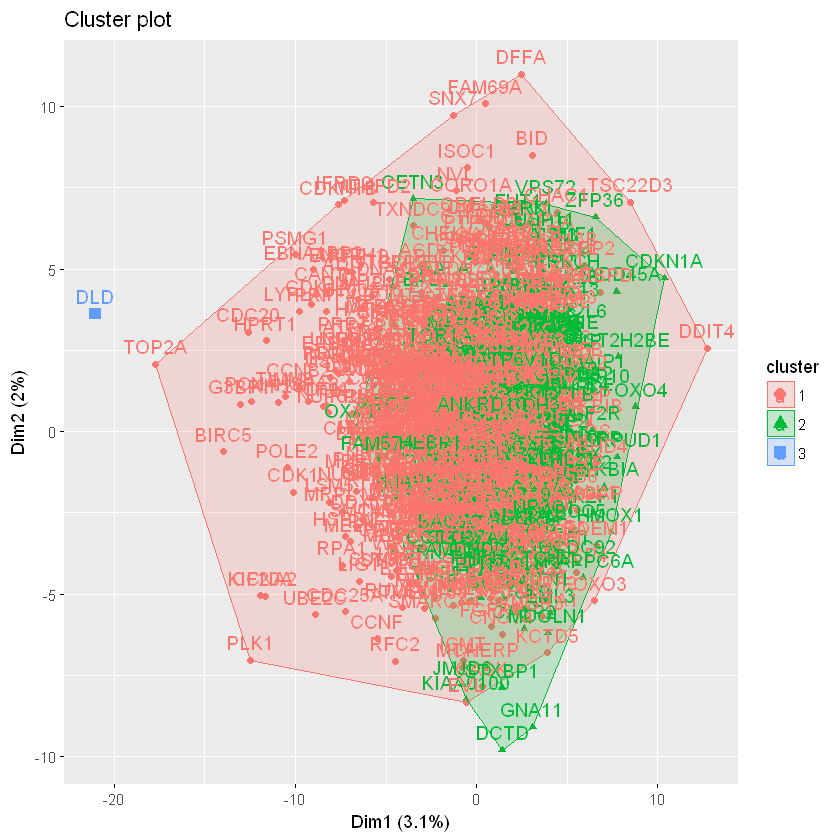

In [183]:
# Visualize the groups.
fviz_cluster(list(data = rev.data, cluster = groups2))

#### If we use 2 clusters, the following genes are identified to belong to its respective groups.

In [184]:
# Identify which belongs to each group.
sapply(unique(groups1),function(g)rev.data[groups == g,])

[[1]]
           ACETAZOLAMIDE    IRBESARTAN IPRATROPIUM BROMIDE     EFAVIRENZ
PSME1      -1.515910e-02 -2.681198e-02        1.017958e-03 -4.398264e-03
ATF1       -3.147053e-02  1.215198e-02       -8.650622e-03  5.538799e-02
RHEB       -4.733488e-03 -2.555015e-02       -1.812870e-02  4.658520e-03
FOXO3       2.591061e-02 -2.401181e-02       -2.079971e-02  1.380732e-02
RHOA        5.629677e-03 -1.067174e-02       -2.722781e-04 -3.406973e-02
IL1B       -7.325439e-03  7.095115e-02        2.500336e-02  2.400589e-02
ASAH1       1.187782e-02  3.130203e-03       -1.193007e-02  2.827080e-02
RALA        2.216377e-02  1.025147e-02       -1.534971e-03  3.174473e-02
ARHGEF12    1.593569e-02  6.415858e-02        2.130394e-03  4.021388e-03
SOX2        1.867957e-03  4.275614e-03        1.320704e-02 -7.478017e-03
SERPINE1    5.364555e-02 -1.339621e-02       -3.673604e-02 -5.133134e-03
HLA.DMA     1.616967e-02 -2.637835e-02       -1.869585e-04 -2.243528e-02
EGF        -1.047386e-02 -1.107319e-02        1.246445e-02  2.552100e-03
APP         6.264292e-03 -7.276688e-03       -1.049738e-02 -9.437163e-03
NOS3        4.489467e-02 -2.599797e-02        9.918860e-03  1.499500e-02
CSNK1A1    -7.597728e-03 -4.622327e-04       -1.109619e-02 -2.399438e-02
NFATC4      3.302475e-02  1.108096e-02        5.871478e-03  1.040345e-02
TBP        -9.180880e-03 -1.884384e-02        1.191925e-03  4.904294e-03
BRCA1      -4.801106e-02  1.330408e-02       -3.608489e-03  3.250022e-02
PSMD4      -2.022142e-02 -9.440527e-03       -5.478129e-03 -9.029595e-03
ETV1       -4.177787e-02  1.465725e-02       -1.276952e-03 -2.851958e-02
TERT       -3.054762e-03 -1.199525e-02        1.854853e-02  3.894525e-03
EED        -1.547521e-02 -2.252330e-02       -4.455230e-03  2.771484e-02
PTK2B      -9.535512e-03  2.386459e-02        1.183728e-02  7.577430e-03
HSPB1       2.880817e-02  1.255823e-02       -1.001282e-02 -5.451363e-02
PIK3C3      5.835466e-04  2.368801e-02       -3.579258e-03  3.546752e-02
CBLB        1.520006e-03  6.033283e-03        1.638055e-01 -1.323312e-02
DFFB        1.005640e-01  3.741231e-03        1.497418e-02 -5.652656e-03
TGFB3       2.467844e-02  7.058381e-02        2.451219e-02 -7.383727e-03
PRKX        4.533806e-02  8.618090e-02        1.467259e-02 -1.583556e-02
CCND1      -2.300714e-02 -9.348832e-03       -2.730087e-02 -6.184343e-02
NFKBIB     -8.854802e-02 -2.469313e-02       -1.716242e-02  1.007858e-02
GLI2       -3.354706e-02  2.210015e-02        7.861450e-03 -7.948241e-03
PIK3CA      1.135552e-02 -2.261313e-02       -4.077075e-03 -4.512895e-02
RPS6        8.721952e-03 -9.774449e-03       -8.284314e-03 -1.204430e-02
DFFA        3.164466e-02  4.804564e-02        5.770486e-03 -2.436504e-02
SUZ12      -2.186576e-03  6.020158e-03       -6.036071e-03  2.761422e-02
TICAM1     -4.286344e-03  8.397157e-03        9.372381e-03 -3.352226e-02
EDN1       -5.541912e-03 -1.378124e-02       -2.027368e-03  5.513190e-04
SQSTM1      9.570600e-03 -2.273158e-02        1.678166e-02  2.298762e-02
HIF1A       1.934997e-02  4.020054e-02        1.185245e-02  2.025470e-03
PTGS2       2.976159e-02 -2.789982e-02        2.092124e-02  1.554393e-01
PLA2G4A     8.178696e-04 -5.673118e-03       -5.108662e-03 -2.890526e-03
MAT2A       1.142701e-02 -2.351242e-03       -1.446590e-02 -1.718623e-01
EIF4G1      4.152614e-02 -2.216499e-02       -3.796448e-03 -6.704070e-02
BTK         2.369847e-03  1.235052e-02        2.304310e-03  1.477431e-04
MYL9        2.303751e-03  4.412351e-02       -1.099501e-02 -3.479156e-03
PSMD2      -3.114715e-03 -3.393071e-02       -4.041799e-03 -1.339591e-02
CLTC        2.528789e-02 -6.245498e-03       -7.615497e-03 -1.775818e-02
ALDOA       3.073732e-02 -4.329031e-04        8.987828e-03 -4.888370e-02
STAT5B      4.412876e-03 -6.827203e-03       -7.475979e-03 -1.344436e-02
ETS1       -2.680522e-02  2.739481e-02        1.484305e-02 -6.361887e-02
HSPD1      -9.937932e-03  1.079480e-02        3.800806e-03 -8.728240e-02
CEBPA       3.783758e-02 -7.780957e-03       -3.2083

In [185]:
# Identify the medians for each group per drug.
aggregate(rev.data,list(groups1),mean)

Group.1 ACETAZOLAMIDE IRBESARTAN    IPRATROPIUM BROMIDE EFAVIRENZ    
1 1       -0.000054363  -8.768794e-05  4.371337e-05       -1.544609e-05
2 2        0.053112651   8.567112e-02 -4.270796e-02        1.509083e-02
  THIAMINE      IOXAGLATE     ARTICAINE     IOVERSOL      DONEPEZIL     ...
1 -9.261634e-05 -4.494864e-05 -1.476966e-05  4.149678e-06 -3.703512e-06 ...
2  9.048617e-02  4.391482e-02  1.442995e-02 -4.054235e-03  3.618331e-03 ...
  ZOLMITRIPTAN  BENZYDAMINE   RAPAMYCIN     TROGLITAZONE  PYRIMETHAMINE
1  2.609630e-06 -0.0000244166  1.828657e-05  2.639866e-05 -3.461828e-05
2 -2.549609e-03  0.0238550212 -1.786598e-02 -2.579149e-02  3.382206e-02
  PYRIDOSTIGMINE OLANZAPINE    PIROXICAM     OFLOXACIN     ECONAZOLE    
1  0.0000156199  -5.641433e-05 -0.0000320644 -2.682597e-05 -1.015123e-05
2 -0.0152606389   5.511680e-02  0.0313269181  2.620897e-02  9.917756e-03

### Hierarchical clustering based on Correlation Distance.

#### The correlation distance in hierarchical clustering is used to evaluate the "goodness" of the clustering, in which, an ideal cluster has a similarity of 1 to all the points in the cluster and a similarity of 0 points to points in other clusters (Reference: https://www-users.cs.umn.edu/~kumar001/dmbook/ch8.pdf).

In [186]:
# Pairwise distances using the correlation coefficient
cor.dist <- as.dist ((1- cor(t(rev.data)))/2)

In [187]:
# Apply hierarchical clustering using complete link and correlation distance.
ret.hclust2 <- hclust(cor.dist, method = "complete")

#### The dendogram below produces a height of 0.9 using the correlation metric.

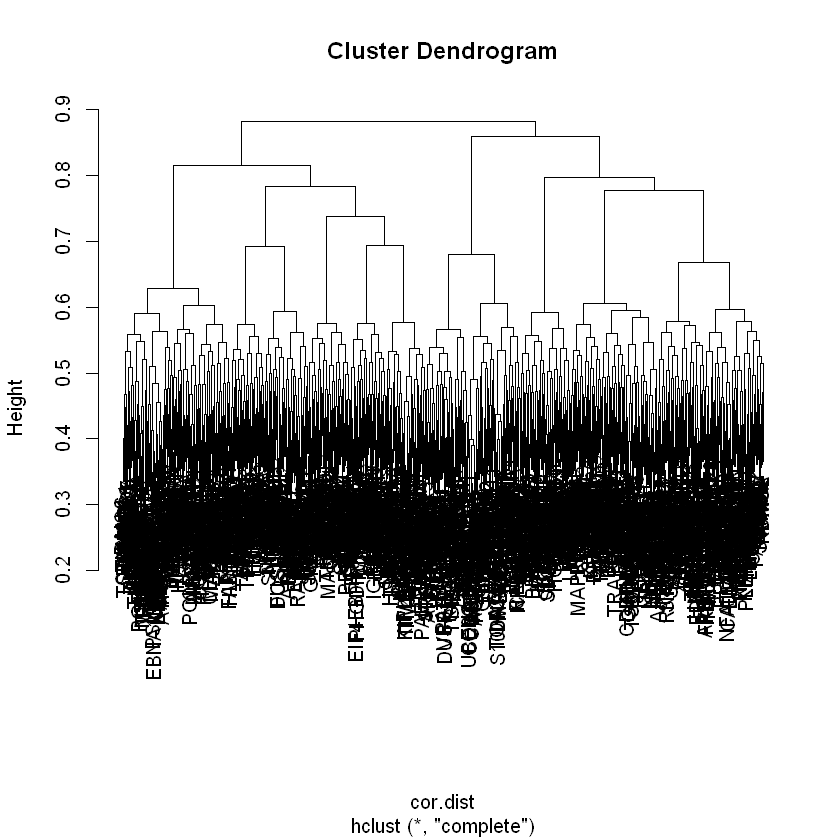

In [188]:
# Plot the dendogram.
plot(ret.hclust2)

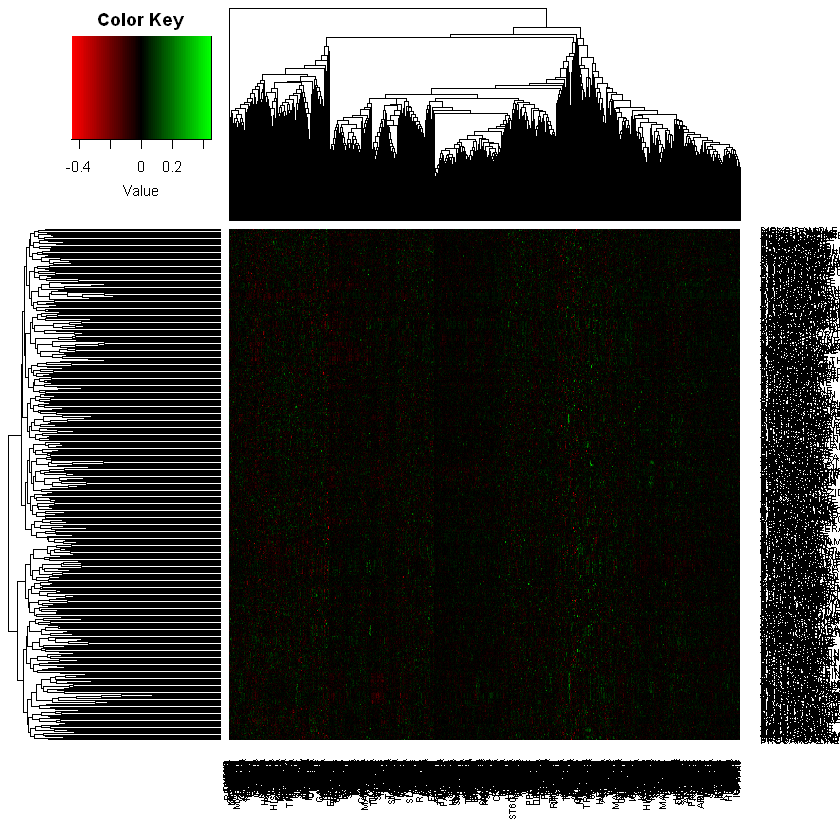

In [189]:
# modify the distance function to use correlation instead
newdist <- function(x) {as.dist(1-cor(t(x))) / 2}
heatmap.2 (as.matrix(my.data), trace="none", density.info="none", col = redgreen(75))

#### Using the same k values (2 and 3), we get the following sizes.

In [190]:
groups3 <- cutree (ret.hclust2, k=2)

In [191]:
table(groups3)

groups3
  1   2 
462 516 

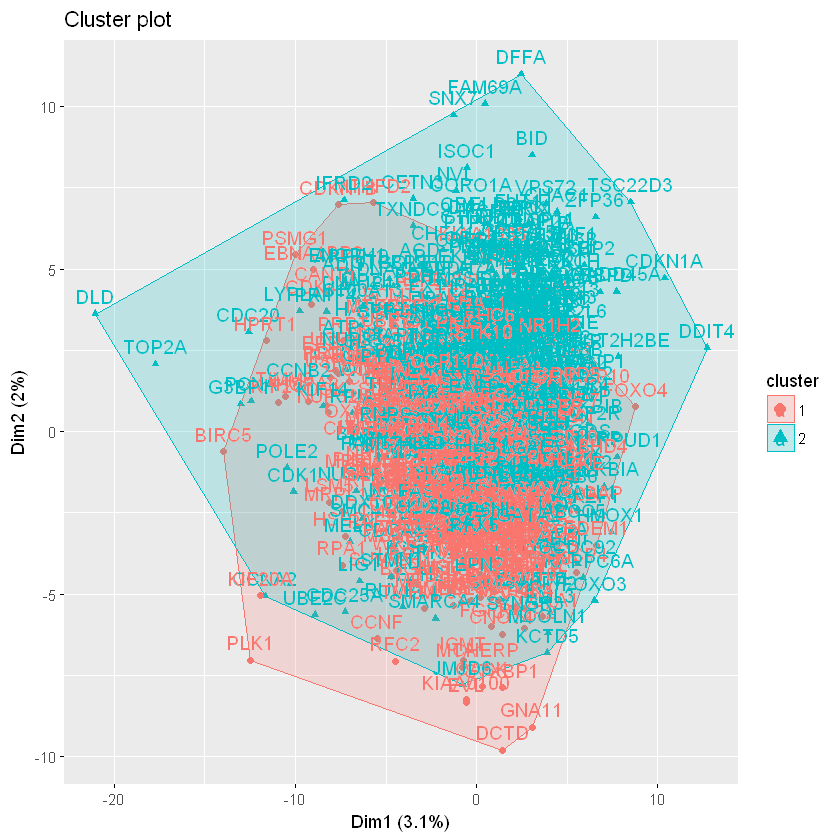

In [192]:
# Visualize the groups.
fviz_cluster(list(data = rev.data, cluster = groups3))

In [193]:
groups4 <- cutree (ret.hclust2, k=3)

In [194]:
table(groups4)

groups4
  1   2   3 
462 145 371 

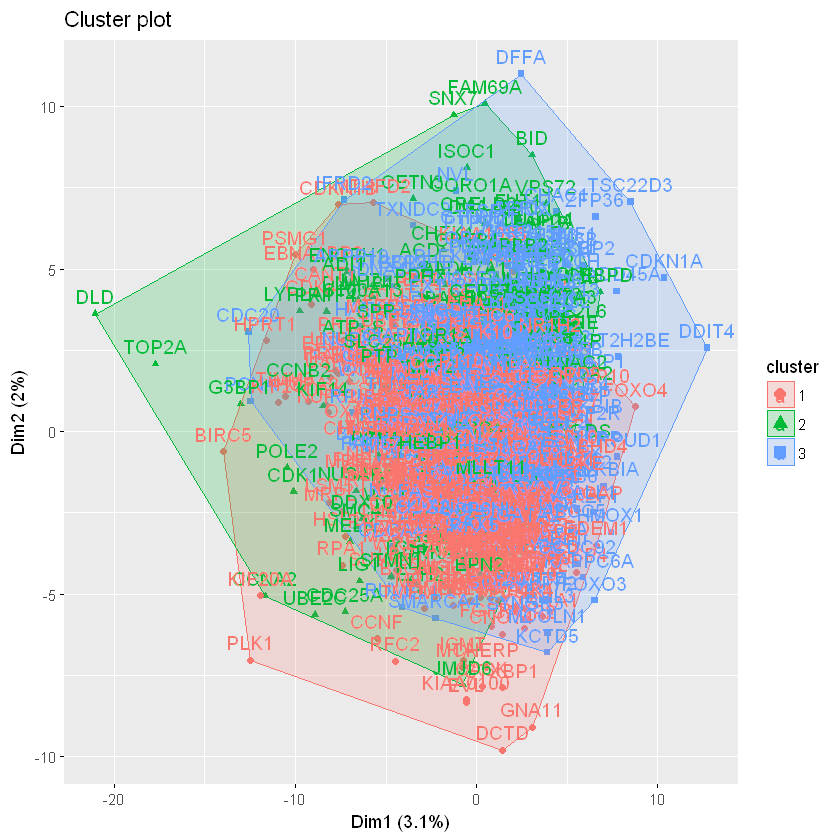

In [195]:
# Visualize the groups.
fviz_cluster(list(data = rev.data, cluster = groups4))

#### 1.d. The differences between Euclidean and correlation pairwise distance measures: Euclidean distance is the square root of the sum of squared differences between corresponding elements of the two vectors. This distance is used for measuring the dissimilarities between observations. Those dissimilarities express the relative positions of points in the multidimensional space. Correlation-based distance considers two objects to be similar if their features are highly correlated, even though the observed values may be far apart in terms of Euclidean distance.

#### Based from the data above, we have seen that the sizes for each clusters are different using the Euclidean distance and the correlation. The points are more distributed when using the correlation distance metric as compared to Euclidean, which produced 1 for cluster 2. The max height or distance are also different.

#### We can further differentiate the two approach using the Rand index. The Rand index has a value between 0 and 1, with 0 indicating that the two data clusterings do not agree on any pair of points and 1 indicating that the data clusterings are exactly the same. Based from the results below, we can say that these two are only 50% similar.

In [196]:
# Install fossil package to use rand index
install.packages("fossil")
# load package
library(fossil)
 

Installing package into 'C:/Users/Jorie/Documents/R/win-library/3.5'
(as 'lib' is unspecified)
Warning message:
"package 'fossil' is in use and will not be installed"

In [197]:
# Compare results from Euclidean-based (groups1) and Correlation-based (groups3) hierarchical clustering when k=2.
library(mclust)
rand.index(groups1, groups3)

[1] 0.5009032

In [198]:
# Compare results from Euclidean-based (groups2) and Correlation-based (groups4) hierarchical clustering when k=3.
rand.index(groups2, groups4)

[1] 0.5018681

### Hierarchical clustering using manhattan distance.

#### Manhattan distance is the sum of the magnitudes of the differences in each dimension.

In [199]:
# Clustering using manhattan distance
ret.hclust3<- hclust(dist(rev.data, method = "manhattan"), method = "complete")

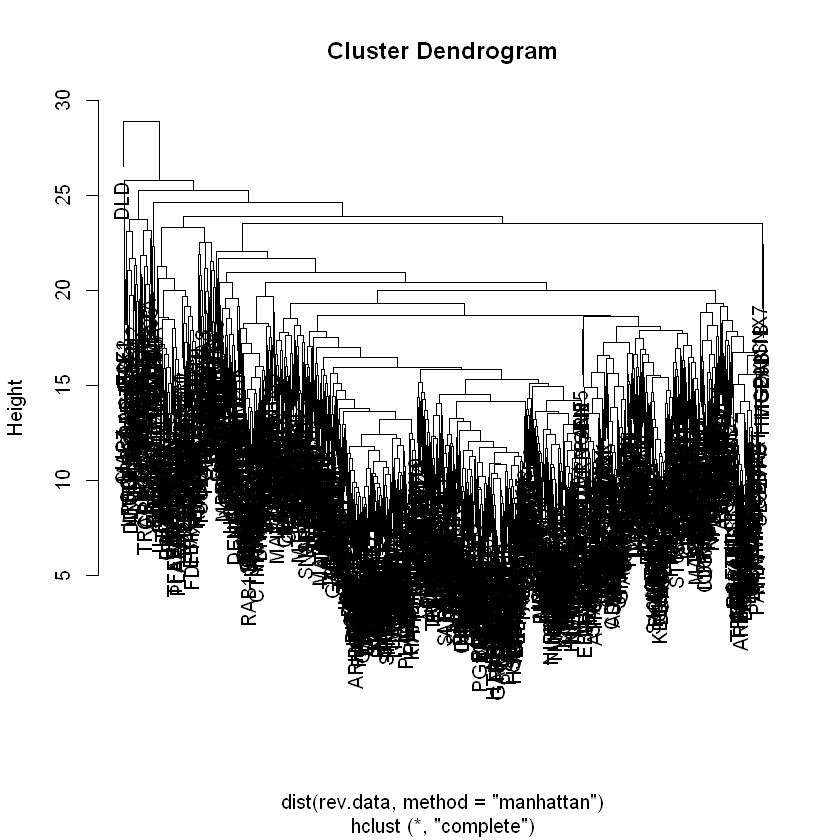

In [200]:
# Plotting the dendogran.Distance unit is different with Euclidean and Correlation.
plot(ret.hclust3)

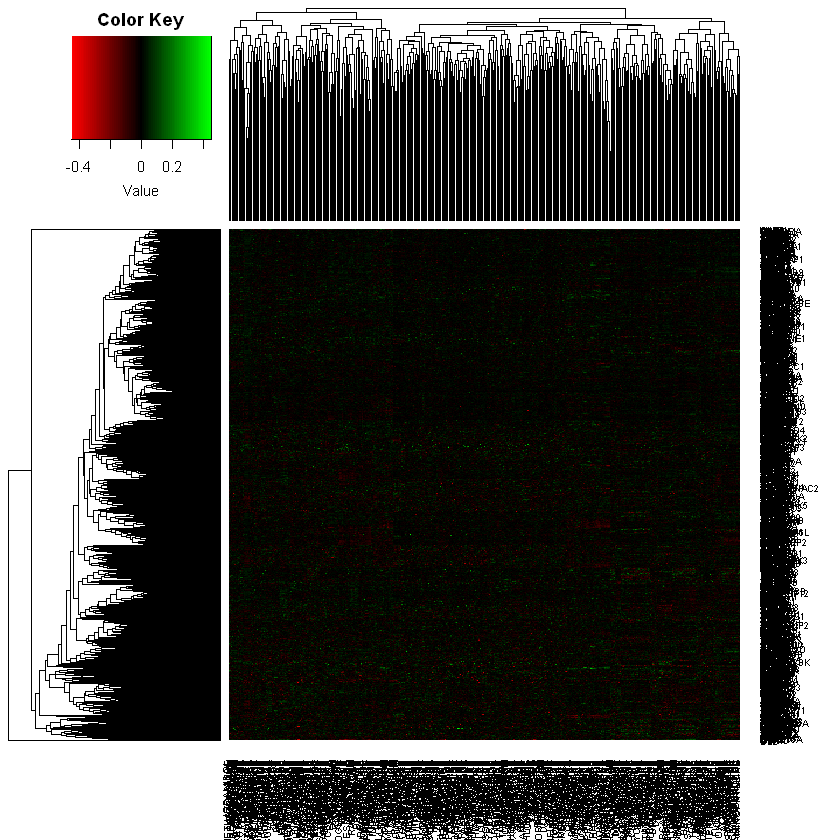

In [201]:
# Heatmap has no clear separation between the categories the same way as the other methods.
heatmap.2(rev.data, distfun=function(x) dist(x, method='manhattan'), trace="none", density.info="none", col=redgreen(75))

In [202]:
# Cut cluster for manhattan at k=2.
groups5 <- cutree (ret.hclust3, k=2)
table(groups5)

groups5
  1   2 
977   1 

In [203]:
# Cut cluster for manhattan at k=3.
groups6 <- cutree (ret.hclust3, k=3)
table(groups6)

groups6
  1   2   3 
975   2   1 

In [204]:
# Check median centroids.
aggregate(rev.data,list(groups5),median)

Group.1 ACETAZOLAMIDE IRBESARTAN   IPRATROPIUM BROMIDE EFAVIRENZ  
1 1       -0.001110455  -0.001537759 -0.0002614518       0.002574662
2 2        0.053112651   0.085671118 -0.0427079625       0.015090832
  THIAMINE     IOXAGLATE   ARTICAINE    IOVERSOL     DONEPEZIL     ...
1 -0.000208085 0.001044841 -0.001283558  0.000512681 -0.0006964756 ...
2  0.090486168 0.043914825  0.014429955 -0.004054235  0.0036183312 ...
  ZOLMITRIPTAN BENZYDAMINE   RAPAMYCIN    TROGLITAZONE PYRIMETHAMINE
1  0.002406530 -0.0005154302  0.001763432  0.001377052 -0.0003130301
2 -0.002549609  0.0238550212 -0.017865982 -0.025791487  0.0338220572
  PYRIDOSTIGMINE OLANZAPINE   PIROXICAM    OFLOXACIN    ECONAZOLE  
1 -0.0007360533  0.0002819833 7.572247e-05 -0.000690995 0.001127530
2 -0.0152606389  0.0551168028 3.132692e-02  0.026208970 0.009917756

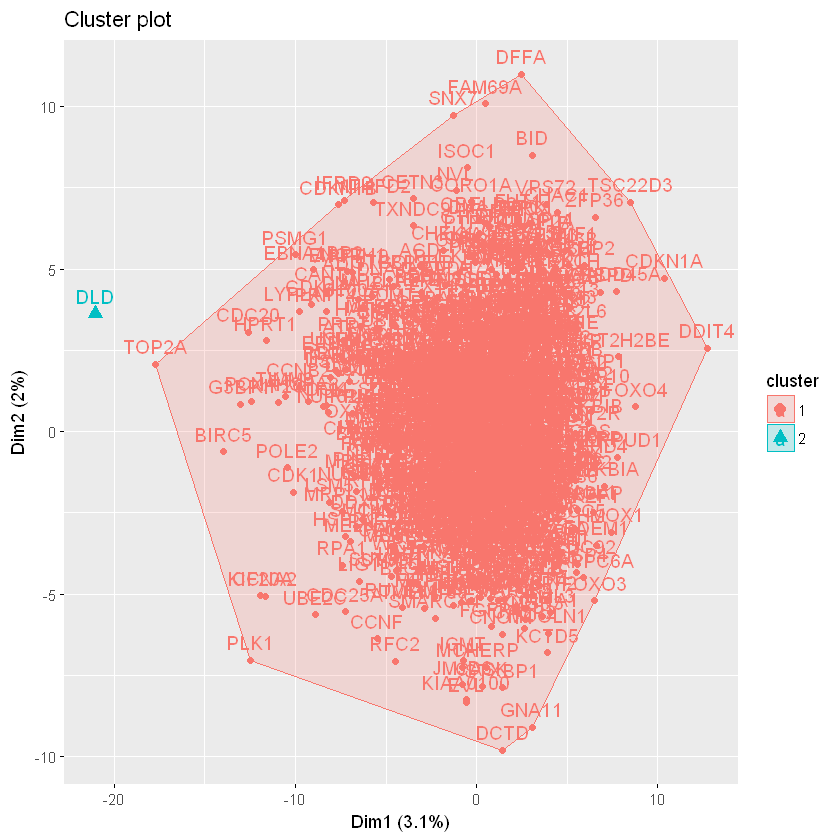

In [205]:
fviz_cluster(list(data = rev.data, cluster = groups5))

In [206]:
table(groups1, groups3)

       groups3
groups1   1   2
      1 462 515
      2   0   1

In [207]:
# Comparison between Euclidean and Manhattan when k=2.
rand.index(groups1, groups5)

[1] 1

In [208]:
# Comparison between Euclidean and Manhattan when k=3.
rand.index(groups2, groups6)

[1] 0.5635192

In [209]:
# Comparison between Correlation and Manhattan when k=2.
rand.index(groups3, groups5)

[1] 0.5009032

In [210]:
# Comparison between Correlation and Manhattan when k=3.
rand.index(groups4, groups5)

[1] 0.3898563

#### 1.e. The result above shows that when k=2, Manhattan-based clustering and Euclidean-based clustering are the same based from the resulting index of 1. At k=3, they are almost similar with higher rand value. For the correlation comparison, on the other hand, the highest similarity is at ~ 50% when using k=2 and it becomes more dissimilar, when k=3.

#### Cluster dendrograms show that genes are more evenly distributed between clusters for correlation pairwise distance clustering. Considering the number of genes (978), we deal with high-dimensional vector space. So, it's hard to find genes which are close to each other using Euclidean distance.

## K-means Clustering

### Determining  number of clusters using average silhouette.

In [211]:
library(cluster)
out.vec <- NULL
for (k in seq(2, 20, by=2)) {
    curr.kmeans <- kmeans(rev.data, k)
    curr.sil <- silhouette(curr.kmeans$cluster, dist(rev.data, method='euclidean'))
    out.vec <- c(out.vec, mean(curr.sil[,3]))
}

Warning message:
"did not converge in 10 iterations"

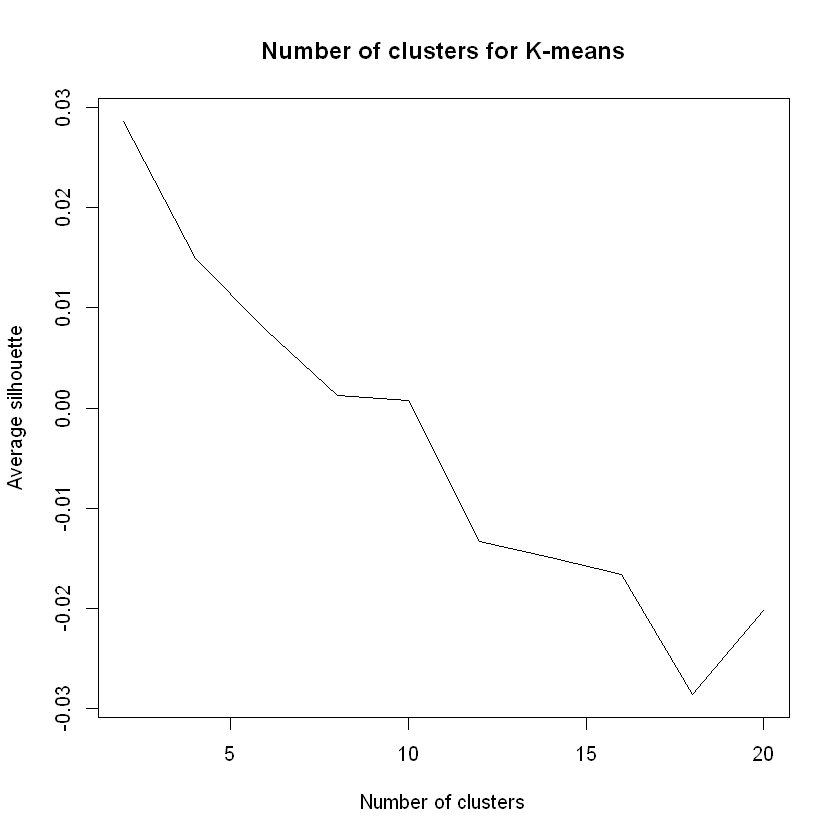

In [212]:
plot(seq(2, 20, by=2), out.vec, type='l', main='Number of clusters for K-means', xlab='Number of clusters',
     ylab='Average silhouette')

#### 2.a. Silhouette coeﬃcient is a measure of how similar an object is to its own cluster compared to other clusters. From the plot above we choose a local maxima 6 as the number of classes for K-means clustering. The same k- value is also used when elbow method is evaluated. The value is identified based on the change of value in the graphs. The sudden change in the graph might indicate where the objects are marginal to the cluster.  In the elbow method, after point 6 is where the lines started falling steeply at constant value.



### Determinining optimal number of clusters using elbow method.

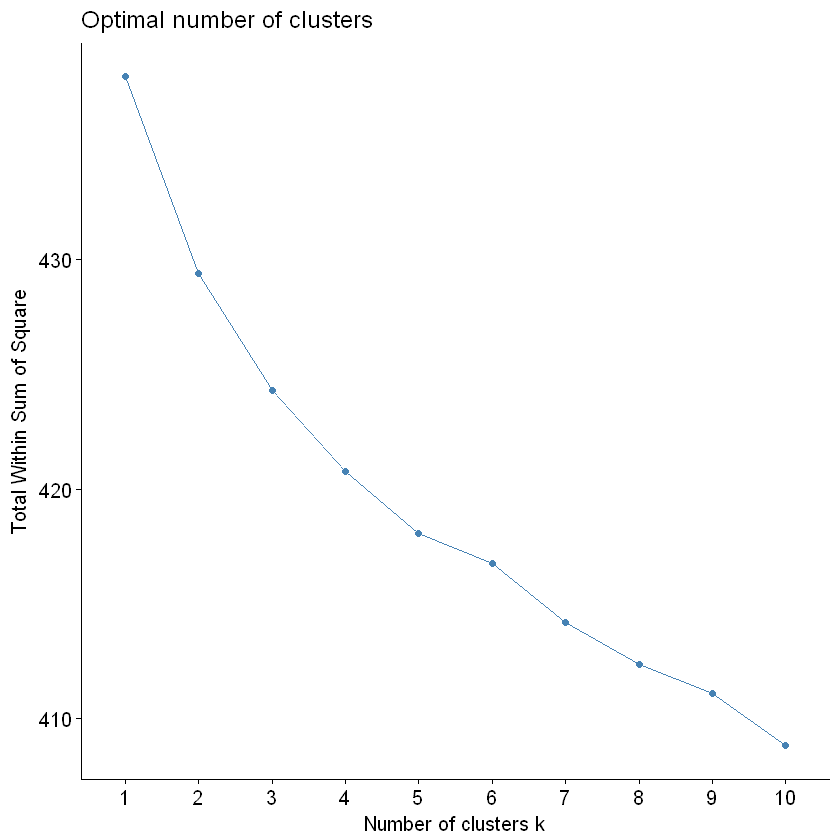

In [213]:
fviz_nbclust(rev.data, kmeans, method = "wss") 

In [214]:
# Clustering by k-means using k=6.
ret.k <- kmeans(rev.data, 6)

#### 2.b. The cluster distribution varies as shown from the bar plot below.Based from the resulting within sum of square or the metric to identify how compact the cluster is, the smaller the size is, the more compact the cluster is.

In [215]:
# Determine cluster size
ret.k$size

[1] 112 345 191  96 213  21

In [216]:
ret.k$withinss

[1]  47.18632 136.44047  78.45621  42.67682  94.79775  17.30065

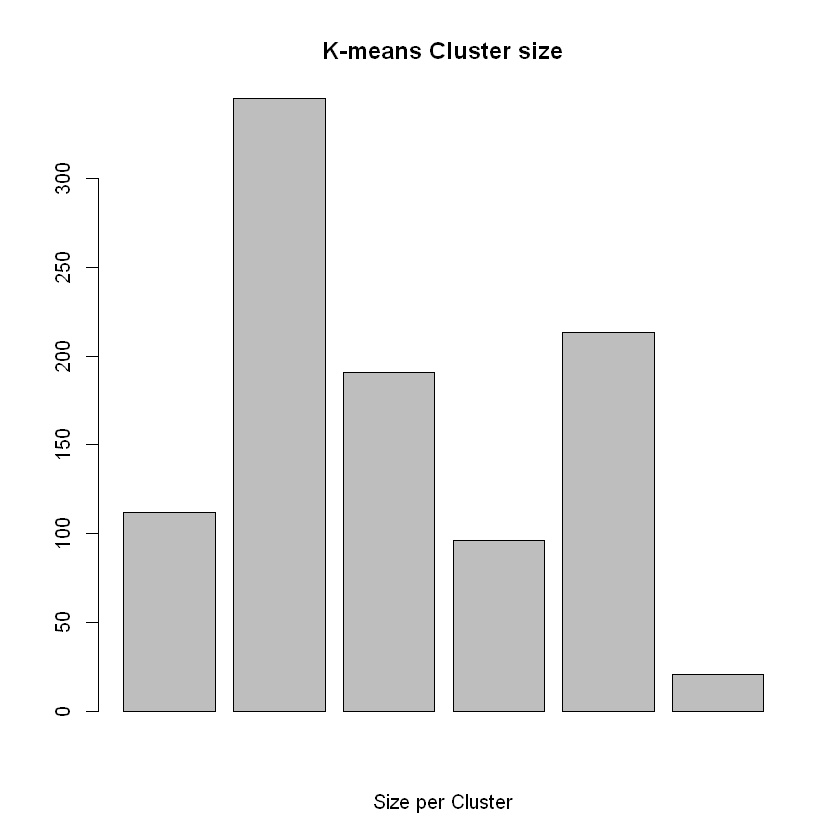

In [217]:
# Generate bar plot of the cluster sizes.
barplot(ret.k$size, main = "K-means Cluster size", xlab="Size per Cluster")


In [218]:
ret.k

K-means clustering with 6 clusters of sizes 112, 345, 191, 96, 213, 21

Cluster means:
  ACETAZOLAMIDE   IRBESARTAN IPRATROPIUM BROMIDE    EFAVIRENZ      THIAMINE
1   0.003452818  0.002114586       -0.0038701612  0.007051215 -0.0041157031
2   0.000337376 -0.006511425       -0.0010970425 -0.001991703 -0.0003852408
3  -0.008386329  0.006320440       -0.0044607567  0.005071297 -0.0011384562
4  -0.009710780 -0.004978602        0.0002830423 -0.004099894  0.0036992749
5   0.010528345  0.006623128        0.0067876879 -0.002127611  0.0021210472
6  -0.010077338 -0.006208416        0.0090948890 -0.010687873  0.0002094532
      IOXAGLATE     ARTICAINE     IOVERSOL    DONEPEZIL  DOMPERIDONE
1  0.0042513405 -0.0059368801  0.003804660  0.002169014 -0.001842525
2  0.0029339075  0.0007402752  0.011965217 -0.001492934 -0.001815799
3 -0.0009142740 -0.0006927176 -0.011202390  0.001067412 -0.003626249
4  0.0005472446  0.0056455871  0.001973663 -0.003011428 -0.002295794
5 -0.0084260488 -0.0008878816 -0.012

### Comparing k-means to hierarchical clustering when k=3.

#### Looking at the results below, we can determine that there are no clusters that are completely identical to each other based from the two approaches. There are 1 or 2 clusters that are similar, which, in a sense, that cluster is a portion of another cluster. This could be also the reason why the rand index is at approximately at 0.5.

In [219]:
# To effectively compare these two approach we will be utilizing the same k value which is 3.
ret.k3 <- kmeans(rev.data, 3)


In [220]:
# Comparing Hierarchical-Euclidean clustering vs. K-means Clustering
table(groups2, ret.k3$cluster)
rand.index(groups2, ret.k3$cluster)

       
groups2   1   2   3
      1 138 246 280
      2 103 187  23
      3   0   0   1

[1] 0.5094578

In [221]:
# Comparing Hierarchical-Correlation clustering vs. K-means Clustering
table(groups4, ret.k3$cluster)
rand.index(groups4, ret.k3$cluster)

       
groups4   1   2   3
      1  38 258 166
      2  68  19  58
      3 135 156  80

[1] 0.5768232

In [222]:
# Comparing Hierarchical-Manhattan clustering vs. K-means Clustering
table(groups6, ret.k3$cluster)
rand.index(groups6, ret.k3$cluster)

       
groups6   1   2   3
      1 239 433 303
      2   2   0   0
      3   0   0   1

[1] 0.3555582

### Comparing k-means and hierarchical clustering when k=6.

#### Using a higher value of k, the rand indices were higher as compared to the indices when k=3. Thus, the clusters are more similar when k=6 except when using the hierarchical complete based on Manhattan distance clustering. 

In [223]:
# Comparing Hierarchical-Euclidean clustering vs. K-means Clustering
hcl1.6 <- cutree (ret.hclust1, k=6)
table(hcl1.6, ret.k$cluster)
rand.index(hcl1.6, ret.k$cluster)

      
hcl1.6   1   2   3   4   5   6
     1  36 181 132  72  42   7
     2  60 132  20   8  90   2
     3  15  32  39  14  81  11
     4   1   0   0   0   0   0
     5   0   0   0   2   0   0
     6   0   0   0   0   0   1

[1] 0.5994353

In [224]:
# Comparing Hierarchical-Euclidean clustering vs. K-means Clustering
hcl2.6 <- cutree (ret.hclust2, k=6)
table(hcl2.6, ret.k$cluster)
rand.index(hcl2.6, ret.k$cluster)

      
hcl2.6   1   2   3   4   5   6
     1   6  92  27  36  13   6
     2   7  17  31  26  62   2
     3  11  37   9   1  18   0
     4  15  67  13   9   9   5
     5  23  58  68   4   8   3
     6  50  74  43  20 103   5

[1] 0.6816828

In [225]:
# Comparing Hierarchical-Euclidean clustering vs. K-means Clustering
hcl3.6 <- cutree (ret.hclust3, k=6)
table(hcl3.6, ret.k$cluster)
rand.index(hcl3.6, ret.k$cluster)

      
hcl3.6   1   2   3   4   5   6
     1  96 325 165  85 155  11
     2   8  11  16   2  48   5
     3   7   9  10   2   9   4
     4   0   0   0   7   0   0
     5   1   0   0   0   1   0
     6   0   0   0   0   0   1

[1] 0.3926862

#### 2.d. The first plot shows all the points that belong to each cluster. Since there are overlapping clusters,  there are points that are not clearly shown. The second plot provided a more separate vizualizations of the clusters minimizing the co-existing cluster points. The resulting graph showed that some points are within the overlapping groups. Probably because they are almost similar in pattern.

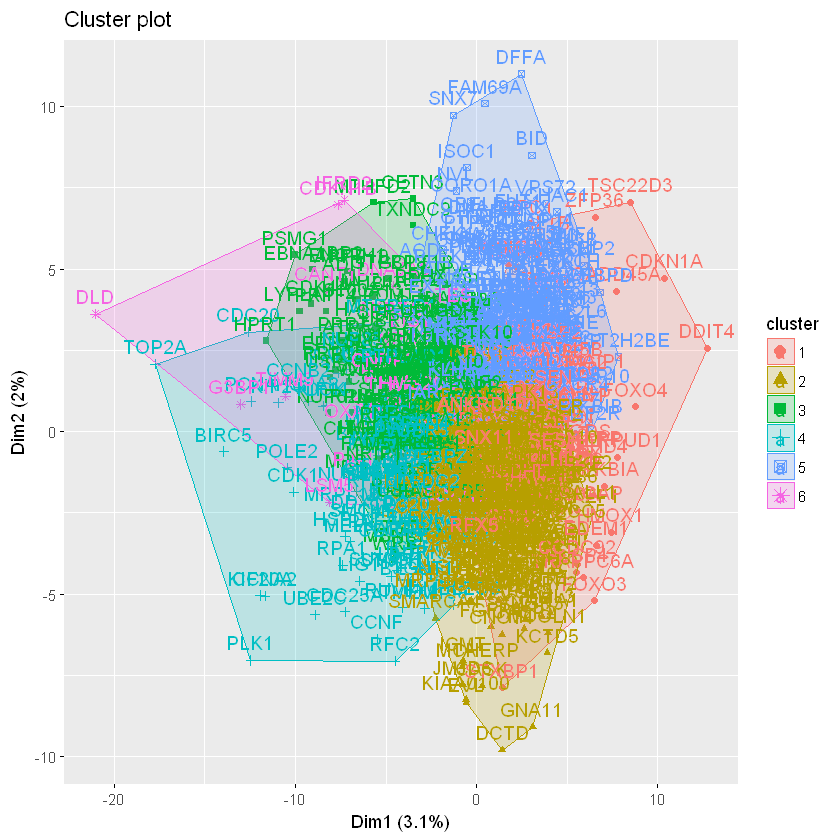

In [226]:
# Plotting the cluster.
fviz_cluster(ret.k, data = rev.data)

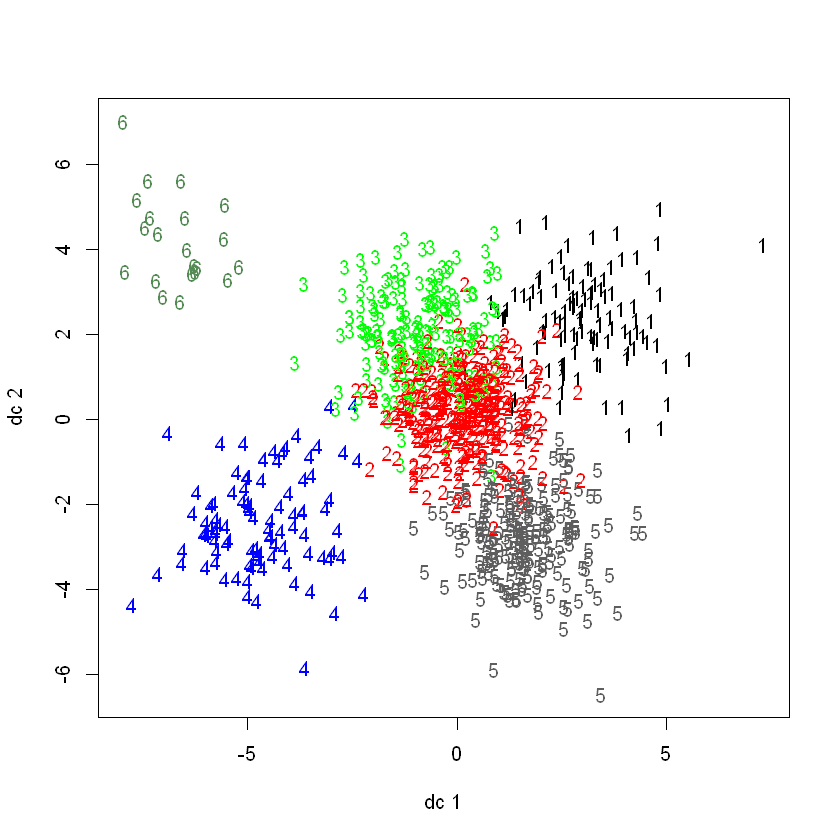

In [227]:
# Cluster visualization using discriminant coordinates
library(cluster)
library(fpc)
plotcluster(rev.data, ret.k$cluster)

#### The silhouette plot did not show anything, possibly because the values are close to 0.

In [228]:
library (cluster)
sf <- silhouette (ret.k$cluster, dist(rev.data, method="euclidean"))

In [229]:
summary(sf)

Silhouette of 978 units in 6 clusters from silhouette.default(x = ret.k$cluster, dist = dist(rev.data, method = "euclidean")) :
 Cluster sizes and average silhouette widths:
         112          345          191           96          213           21 
-0.003460397  0.027639473  0.013937331 -0.002711420 -0.009753597 -0.128361051 
Individual silhouette widths:
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-0.171133 -0.008545  0.010604  0.006929  0.025347  0.080994 

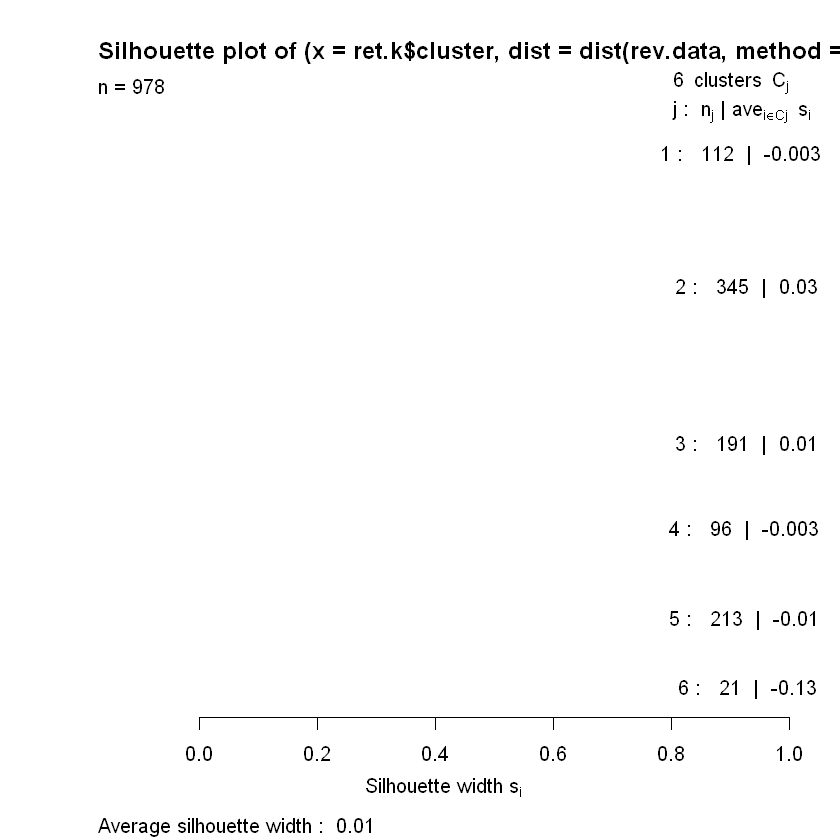

In [230]:
plot(sf)

## Summary

### The k-means  is parameterized by the value k, which is the number of clusters that we  want to create. the algorithm begins by creating k centroids,then iterates between an assign step and an update step (where each centroid is updated to become the mean of all the samples that are assigned to it.) This iteration continues until some stopping criteria is met; for example, if no sample is re-assigned to a different centroid.

### Hierarchical  builds clusters incrementally and produce a dendagram. the algorithm begins by assigning each sample to its own cluster. At each step, the two clusters that are the most similar are merged; the algorithm continues until  all of the clusters have been merged. Unlike k-means, you don't need to specify a k parameter: once the dendogram has been produced, you can navigate the layers of the tree to see which number of clusters makes the most sense to your particular application.
